The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
2513
0j
0j


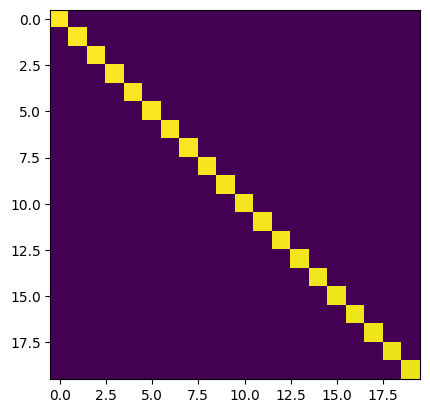

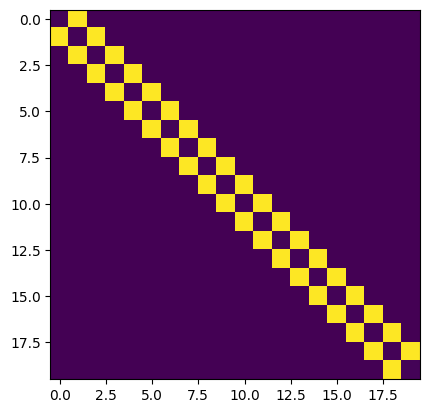

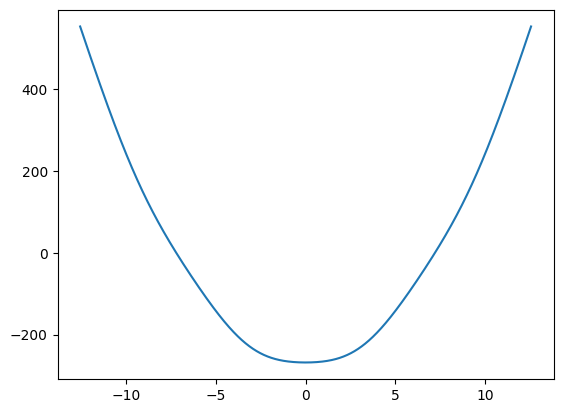

In [5]:
%load_ext autoreload
%autoreload all
from HammiltonSolver_funcs import *
from matplotlib import pyplot as plt

dispDim = 20

Ej = 5.71
Ec = 1.3
El = 0.59
#potFunc = get_potfunc_fluxonium(phie=np.pi, EL=El, EJ=Ej)


phimax = np.pi*4
dphi = 0.01
vecLen = int(2*phimax/dphi)
print(vecLen)
ham = get_fluxonium_hammilton_op(vecLen, phimax, Ec, El, Ej, phi_dc=np.pi)
pot = ham - 4*Ec*get_phisquared_op(vecLen, phimax)
pot -= np.mean(np.diag(pot))*np.eye(vecLen)

hbar = 1

#diff opp
#-1 1
#0 0

#n = -get_diffop_sparse(phimax, dphi)*hbar*1j
#nn = -get_ddop_sparse(phimax, dphi)*hbar**2
a_squared = get_nsquared_op(vecLen, phimax)*hbar**2

#matrixdisplay
"""plt.imshow(n.toarray().imag[dispDim, dispDim])
plt.show()"""

#display second derivative
plt.imshow(a_squared.real[:dispDim, :dispDim])
plt.show()

#potopp
#pot = get_potop_sparse(phimax, dphi, potFunc)

#matrixdisplay
plt.imshow(pot.real[:dispDim, :dispDim])
plt.show()

#plot pot
plt.plot(np.linspace(-phimax, phimax, vecLen), np.diag(pot.real))
plt.show()

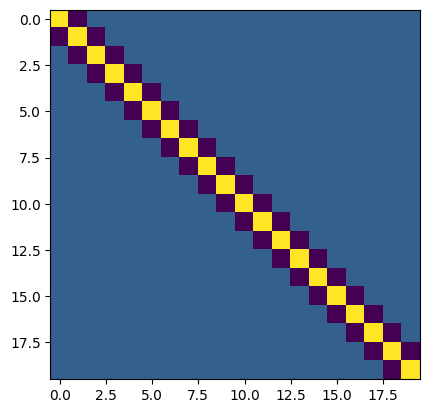

In [6]:
#find eigenvalues
def solveEi(hamiltonian):
    eigvals, eigvecs = np.linalg.eigh(hamiltonian)
    basisTransform = eigvecs
    mask = np.sum(eigvecs.real, axis=0) < 0
    eigvecs[:, mask] *= -1
    return eigvals, eigvecs, basisTransform
#hamiltonian = 4*Ec*nn + Ej*pot

plt.imshow(ham.real[:dispDim, :dispDim])
plt.show()

eigenvalues, eigenvectors, basisTransform = solveEi(ham)
basisTransform = sparse.csr_matrix(basisTransform)




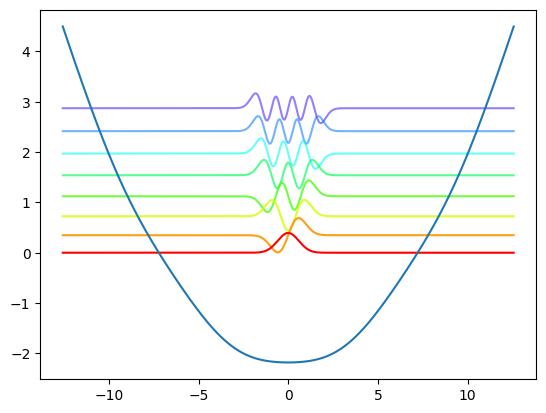

0.27728213537690516
0.28832533057192816
0.2978372842562422
0.30619862627949995
0.31365484355277345


In [7]:
#plot eigenvecs
import numpy as np
PHI = np.linspace(-phimax, phimax, vecLen)
plt.plot(PHI, np.diag(pot.real)/np.linalg.norm(np.abs(np.diag(pot.real)))*100, zorder=101)
#plt.plot(X, eigenvectors[:,0].real, color='red')
#make cmap for differentiating the plots
cmap = plt.get_cmap('hsv')
for i in range(len(eigenvalues)):
    if i != 0: dE = eigenvalues[i]-eigenvalues[i-1]
    else: dE = eigenvalues[i]
    plt.plot(PHI, eigenvectors[:,i].real*4+i*dE*2e-1, color=cmap(i*1e-1),alpha=np.exp(-i*1e-1),zorder=100-i)
    if i > 6: break
#plt.ylim(-0.1,1)
plt.show()
#plot neg eigenvecs
#plt.plot(X, potFunc(X)*1e-3, zorder=1001)
#plt.plot(X, negEigenvectors[:,0].real, color='red')
"""cnt = 0
for i in range(len(negEigenvalues)):
    plt.plot(X, negEigenvectors[:,i].real, color=cmap((i*1e-1)%1),alpha=np.exp(-cnt*1e-2-0.2),zorder=1000-cnt)
    cnt += 1
    if cnt > 1000: break
plt.ylim(-0.2,0.2)
plt.show()"""
#print omega?01
print((eigenvalues[1]-eigenvalues[0])/2/np.pi)
print((eigenvalues[2]-eigenvalues[1])/2/np.pi)
print((eigenvalues[3]-eigenvalues[2])/2/np.pi)
print((eigenvalues[4]-eigenvalues[3])/2/np.pi)
print((eigenvalues[5]-eigenvalues[4])/2/np.pi)

In [8]:
#hDiag = np.dot(np.dot(basisTransform.T, hamiltonian), basisTransform)
#raise NotImplementedError
b = get_phi_op(vecLen, phimax)
from os import environ
environ['OMP_NUM_THREADS'] = '16'
#ham = np.array(ham)
ham = sparse.csr_matrix(ham)
#bT = np.array(basisTransform)
hDiag = basisTransform.T @ ham @ basisTransform
#hDiag = np.dot(np.dot(bT.T, ham), bT)
a = get_n_op(vecLen, phimax)
#phiDiag = np.dot(np.dot(basisTransform.T, phi), basisTransform)
aDiag = basisTransform.T @ a @ basisTransform
#n = n

#nDiag = np.dot(np.dot(basisTransform.T, n), basisTransform)
bDiag = basisTransform.T @ b @ basisTransform

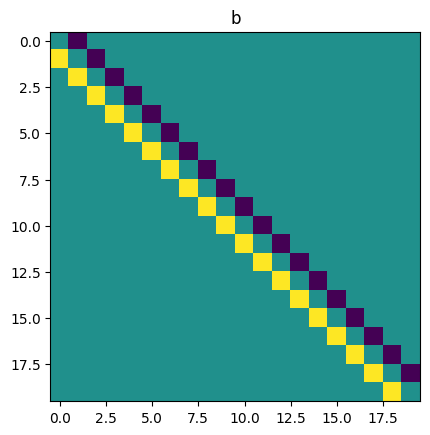

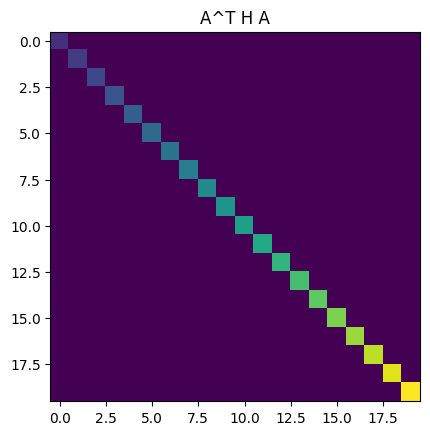

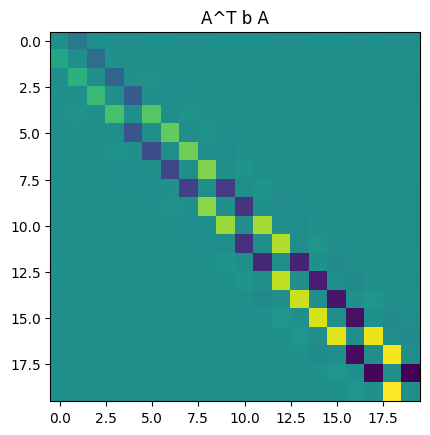

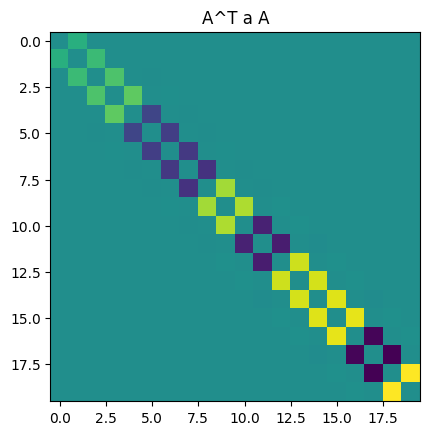

/tmp/ipykernel_9054/1311763267.py:20: RuntimeWarning: invalid value encountered in reciprocal
  plt.plot((deltaE**-1)[:dispDim])
/home/ubuntu-compute/miniconda3/envs/qdev/lib/python3.12/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/ubuntu-compute/miniconda3/envs/qdev/lib/python3.12/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


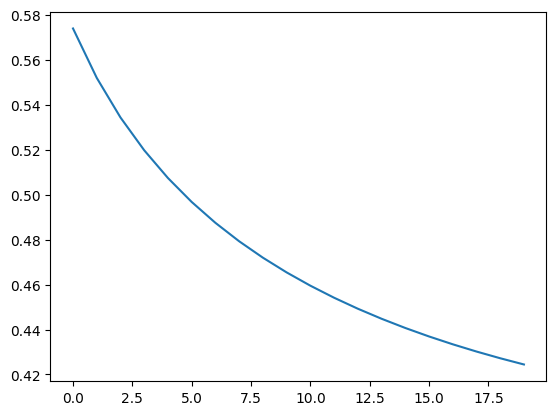

(1.7422150389439892+0j)
(1.811601480736984+0j)


In [9]:
plt.imshow(b.toarray().imag[:dispDim, :dispDim])
plt.title('b')
plt.show()

plt.imshow(hDiag.toarray().real[:dispDim, :dispDim])
plt.title('A^T H A')
plt.show()

plt.imshow(bDiag.toarray().imag[:dispDim, :dispDim])
plt.title('A^T b A')
plt.show()

plt.imshow(aDiag.real[:dispDim, :dispDim])
plt.title('A^T a A')
plt.show()

#compute delta energies and plot them
energies = [hDiag[i,i] for i in range(len(eigenvalues))]
deltaE = np.diff(energies)
plt.plot((deltaE**-1)[:dispDim])
plt.show()
#print omega?01, omega?12, ...
print(energies[1]-energies[0])
print(energies[2]-energies[1])


/home/ubuntu-compute/miniconda3/envs/qdev/lib/python3.12/site-packages/scipy/sparse/_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])


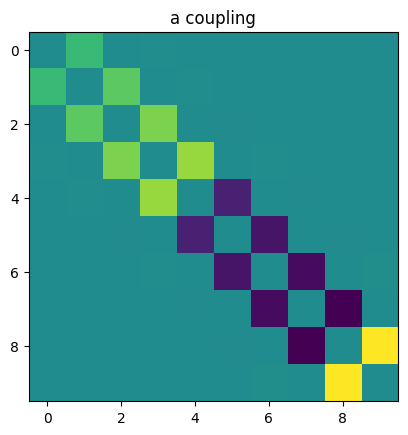

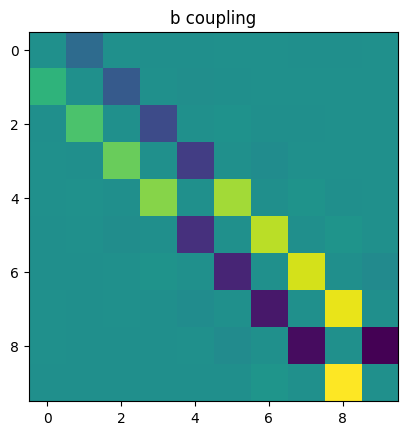

In [10]:
#calculating transfer coefficients

#1 limit the scope to a basis of 10
#2 given a parameter q (pseudo charge), compute the coupling coefficients by inner producting over both x and p opperators
#3 given some field strength of the pertubation, add this
#4 display the coupling matricies

#1
basis = 10
eigenvalues = sparse.csr_matrix(eigenvalues[:basis].astype(np.complex128))
eigenvectors = sparse.csr_matrix(eigenvectors[:,:basis].astype(np.complex128))
basisTransform = sparse.csr_matrix(basisTransform[:,:basis].astype(np.complex128))

#1.5 export the diagonalized hamiltonian
np.save('HDiag_fluxonium.npy', hDiag.toarray()[:basis, :basis])

#2
q = 1
coupling_a = sparse.csr_matrix(np.zeros((basis, basis), dtype=np.complex128))
for i in range(basis):
    for j in range(basis):
        coupling_a[i,j] = np.dot(np.conjugate(eigenvectors.toarray()[:,i].T),np.dot(a, eigenvectors.toarray()[:,j]))*q
        

coupling_b = sparse.csr_matrix(np.zeros((basis, basis), dtype=np.complex128))
for i in range(basis):
    for j in range(basis):
        coupling_b[i,j] = np.dot(np.conjugate(eigenvectors.toarray()[:,i].T),np.dot(b.toarray(), eigenvectors.toarray()[:,j]))*q
        

#3
field = 1
coupling_b *= field
coupling_a *= field

#4
plt.imshow(coupling_a.toarray().real)
plt.title('a coupling')
plt.show()
#save coupling_p
np.save('coupling_n_fluxonium.npy', coupling_a.toarray())

plt.imshow(coupling_b.toarray().imag)
plt.title('b coupling')
plt.show()
#save coupling_x
np.save('coupling_phi_fluxonium.npy', coupling_b.toarray())
